In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

df = pd.read_csv('inputs/europe.csv')
print('Dataset importado')

Dataset importado


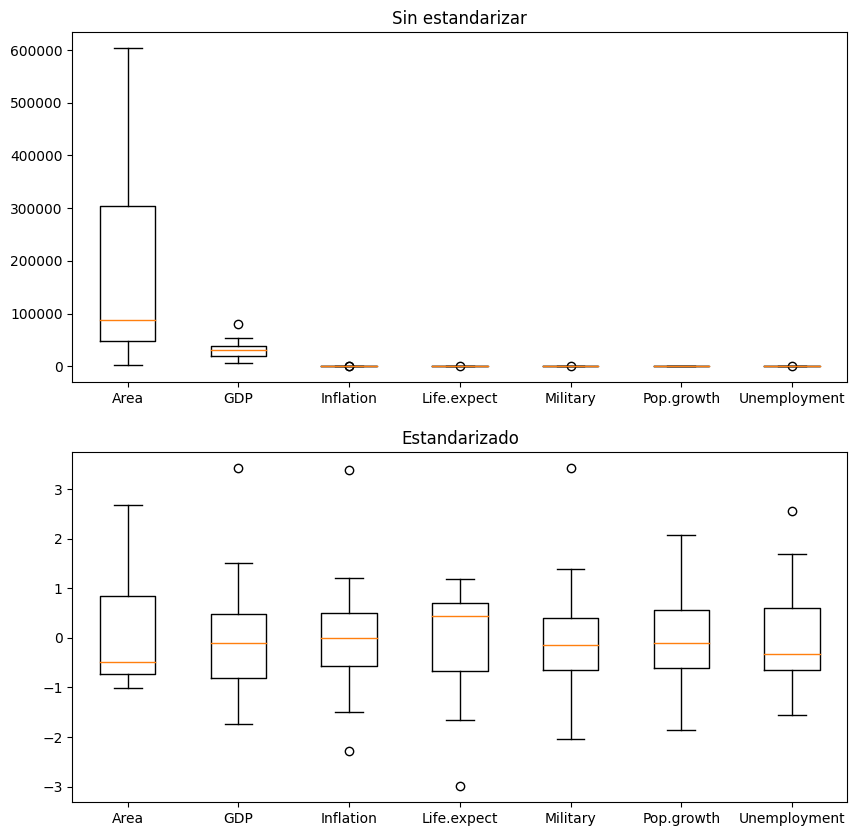

In [82]:
fig, ax = plt.subplots(2, figsize=(10, 10))

x = []
xticks = df.columns[1:]

for column in df.columns[1:]:     # Skipping 'Country' column
    x.append(df[column])
    
ax[0].boxplot(x, labels=xticks)
ax[0].set_title('Sin estandarizar')

##########################################################################

x_std = []
i = 0
for column in x:
    x_std.append([])
    mean = np.mean(column)
    var = np.var(column)
    for value in column:
        x_std[i].append((value - mean) / np.sqrt(var))
    i += 1

ax[1].boxplot(x_std, labels=xticks)
ax[1].set_title('Estandarizado')

plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

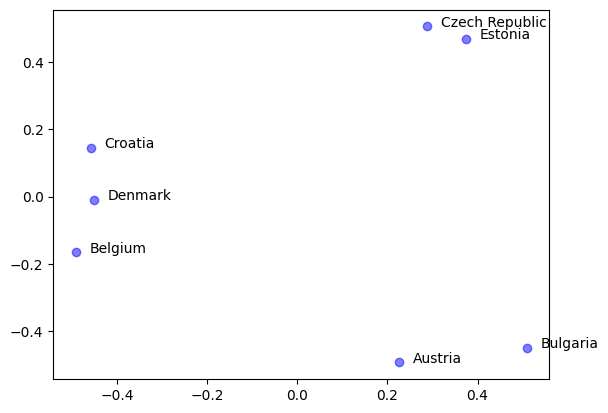

In [98]:
countries = df['Country']
n_vars = len(x_std)
pca = PCA(n_vars)              # O x, es lo mismo
pca.fit(x_std)
data_transformed = pca.transform(x_std)

components = pca.components_.T

xs = data_transformed[:,0]
ys = data_transformed[:,1]

scalex = 1.0 / (xs.max() - xs.min())
scaley = 1.0 / (ys.max() - ys.min())
plt.scatter(xs * scalex, ys * scaley, color='b', alpha=0.5)

for i in np.arange(len(countries)):
    plt.text(xs[i] * scalex + 0.03, ys[i] * scaley, countries[i])
    
for i in np.arange(n_vars):
    plt.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5)
    plt.text(components[i, 0] * 1.15, components[i, 1] * 1.15, xticks[i], color='g', ha='center', va='center')
    
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
